# Regression

In [1]:
print("Hello World")

Hello World


## Notations
Here is a summary of some of the notation you will encounter.  

|  Notation   | Description | Python (if applicable) |
|------------|:-----------------:|---:|
|  $\mathbf{x}$ | Training Example feature values (in this lab - Size (1000 sqft))  | `x_train` |   
|  $\mathbf{y}$  | Training Example  targets (in this lab Price (1000s of dollars))  | `y_train` |
|  $x^{(i)}$, $y^{(i)}$ | $i_{th}$ Training Example | `x_i`, `y_i`|
| m | Number of training examples | `m`|
|  $w$  |  parameter: weight                                 | `w`    |
|  $b$           |  parameter: bias                                           | `b`    |     
| $f_{w,b}(x^{(i)})$ | The result of the model evaluation at $x^{(i)}$ parameterized by $w,b$: $f_{w,b}(x^{(i)}) = wx^{(i)}+b$  | `f_wb` | 


## Tools
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data

In [4]:
# !pip freeze
!pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 1.5 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     -------------------------------------- 957.2/957.2 kB 3.4 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.4-cp39-cp39-win_amd64.whl (55 kB)
  Using cached Pillow-9.2.0-cp39-cp39-win_amd64.whl (3.3 MB)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./assets/deeplearning.mplstyle')

In [6]:
# x_train is the input variable (size in 1000 square feet)
# y_train is the target (price in 1000s of dollars)
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


In [7]:
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (2,)
Number of training examples is: 2


In [9]:
i = 1
x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(1), y^(1)) = (2.0, 500.0)


## Plotting 
You can plot these two points using the `scatter()` function in the `matplotlib` library, as shown in the cell below. 
- The function arguments `marker` and `c` show the points as red crosses (the default is blue dots).

You can use other functions in the `matplotlib` library to set the title and labels to display

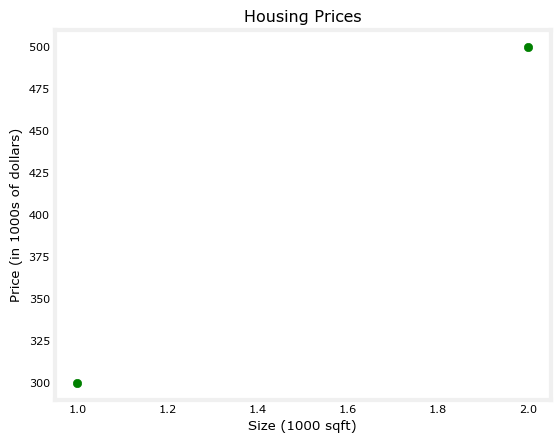

In [12]:
# Plot the data points
plt.scatter(x_train, y_train, marker='o', c='g')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()